___

# REGRESI LOGISTIK

___

In [1]:
import pandas as pd
import numpy as np

In [2]:
# import data dari csv
wine = pd.read_csv('white_wine2.csv')

In [3]:
# manmpilkan beberapa baris data awal
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
print("Dimensi Data : ",wine.shape,"\n")
print("Tipe Data :\n ",wine.dtypes,"\n")
print("Data Hilang :\n ",wine.isnull().sum())

Dimensi Data :  (4898, 12) 

Tipe Data :
  fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object 

Data Hilang :
  fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
# peubah penjelas yang digunakan
FITUR=['density','alcohol']

In [6]:
# definisikan peubah respon (skor>6 memiliki kualitas baik)
wine['label']=np.where(wine['quality']>6,1,0)

___

# EKSPLORASI DATA

___

In [7]:
# library untuk eksplorasi data
import matplotlib.pyplot as plt

# Peubah Respon

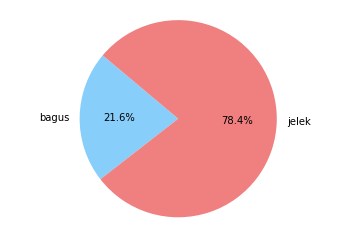

In [8]:
# menghitung ukuran diagram pie
ukuran = [sum(wine['label']),len(wine['label'])-sum(wine['label'])]

# menentukan label
labels = ['bagus','jelek']

# memilih warna 
color = ['lightskyblue','lightcoral']

# diagram pie
plt.pie(ukuran,labels=labels,colors=color,autopct='%1.1f%%',startangle=140)

plt.axis('equal')
plt.show()

# Peubah Penjelas

distribusi peubah

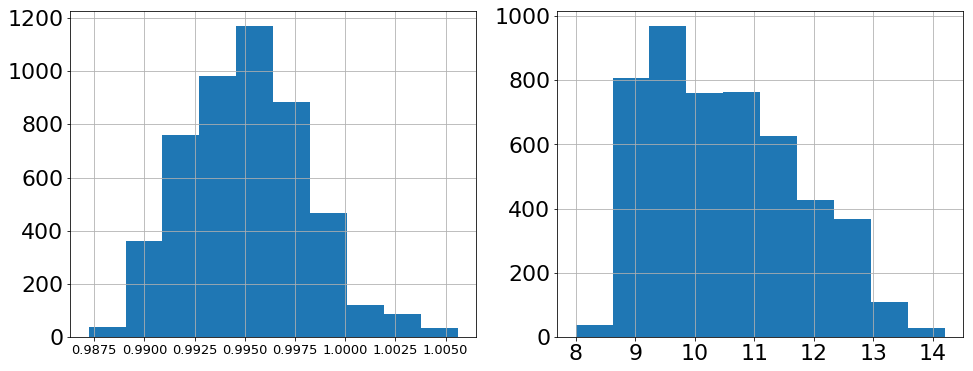

In [9]:
# mengatur ukuran gambar
plt.figure(figsize=(16,6))

# posis gambar pertama untuk peubah density
plt.subplot(1,2,1)
wine['density'].hist()
# mengatur ukuran huruf pada nilai-nilai di smbu x
plt.xticks(fontsize=13)
# mengatur ukuran huruf pada nilai-nilai di smbu y
plt.yticks(fontsize=22)

# posis gambar keuda untuk peubah alcohol
plt.subplot(1,2,2)
wine['alcohol'].hist()
# mengatur ukuran huruf pada nilai-nilai di smbu x
plt.xticks(fontsize=22)
# mengatur ukuran huruf pada nilai-nilai di smbu y
plt.yticks(fontsize=22)

plt.show()

distribusi peubah untuk masing-masing kualitas

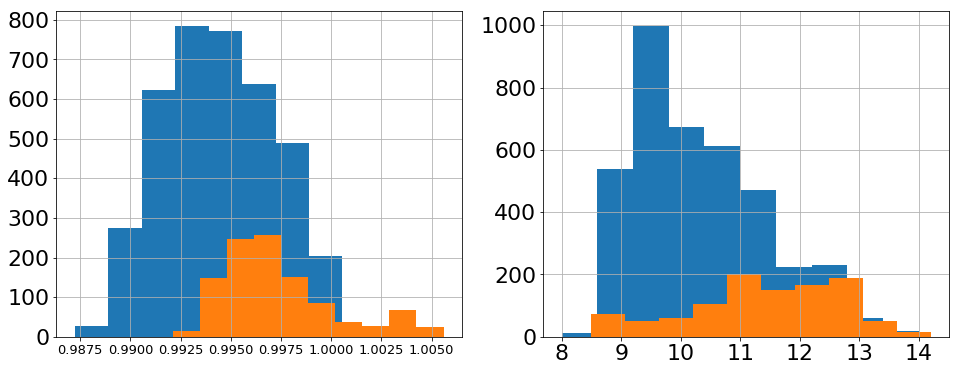

In [10]:
# mengatur ukuran gambar
plt.figure(figsize=(16,6))

# posis gambar pertama untuk peubah density
plt.subplot(1,2,1)
wine[wine['label']==0]['density'].hist()
wine[wine['label']==1]['density'].hist()
# mengatur ukuran huruf pada nilai-nilai di smbu x
plt.xticks(fontsize=13)
# mengatur ukuran huruf pada nilai-nilai di smbu y
plt.yticks(fontsize=22)

# posis gambar keuda untuk peubah alcohol
plt.subplot(1,2,2)
wine[wine['label']==0]['alcohol'].hist()
wine[wine['label']==1]['alcohol'].hist()
# mengatur ukuran huruf pada nilai-nilai di smbu x
plt.xticks(fontsize=22)
# mengatur ukuran huruf pada nilai-nilai di smbu y
plt.yticks(fontsize=22)

plt.show()

diagram pencar peubah alcohol dan density

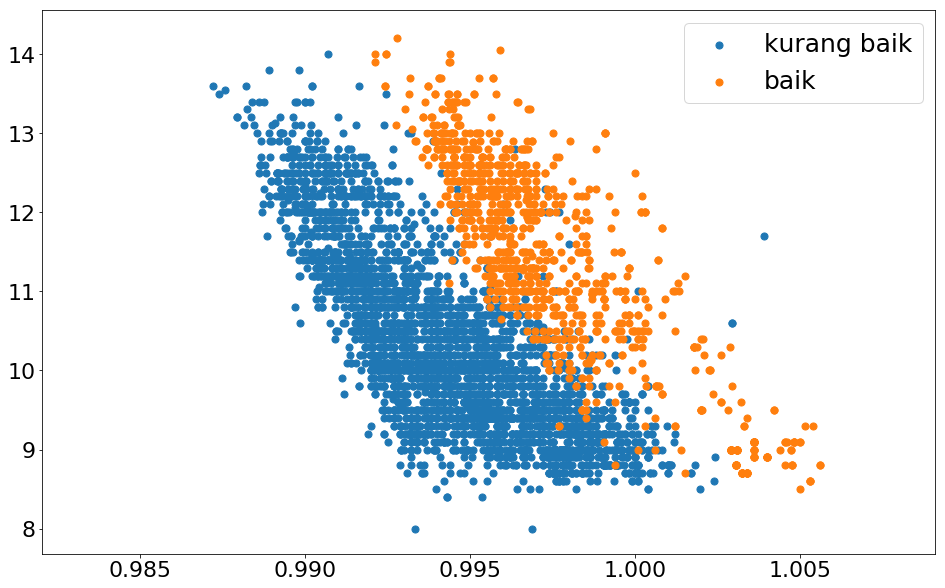

In [11]:
# mengatur ukuran gambar
plt.figure(figsize=(16,10))

# diagram pencar
plt.scatter(wine[wine['label']==0]['density'],wine[wine['label']==0]['alcohol'],marker='o',s=50)
plt.scatter(wine[wine['label']==1]['density'],wine[wine['label']==1]['alcohol'],marker='o',s=50)

# memunculkan keterangan
plt.legend(('kurang baik','baik'),loc='best',fontsize=25)

# mengatur ukuran huruf pada nilai-nilai di smbu x
plt.xticks(fontsize=22)
# mengatur ukuran huruf pada nilai-nilai di smbu y
plt.yticks(fontsize=22)


plt.show()

___

# PEMODELAN REGRESI LOGISTIK

___

# Membagi Data Train Test

In [12]:
# library untuk membagi data
from sklearn.model_selection import train_test_split

In [13]:
# data dibagi menjadi 2 bagian, data traindan data tets
x_train,x_test,y_train,y_test = train_test_split(wine[FITUR],wine['label'],test_size=0.3,random_state=0,stratify=wine['label'])

In [14]:
# memunculkan dimensi masing-masing gugus data
print(x_train.shape)
print(x_test.shape)

(3428, 2)
(1470, 2)


# Menampilkan Model Regresi Logistik

In [15]:
# library untuk membangun regresi logistik
import statsmodels.api as sm

# membangun model regresi logistik
logit_model = sm.Logit(wine['label'],wine[FITUR])
result = logit_model.fit()

# menampilkan model regresi logistik
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.455400
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 4898
Model:                          Logit   Df Residuals:                     4896
Method:                           MLE   Df Model:                            1
Date:                Fri, 28 Dec 2018   Pseudo R-squ.:                  0.1281
Time:                        17:22:31   Log-Likelihood:                -2230.6
converged:                       True   LL-Null:                       -2558.4
                                        LLR p-value:                1.306e-144
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
density       -9.3348      0.347    -26.930      0.000       -10.014    -8.655
alcohol        0.7404      0.

# Melihat Performa Regresi Logistik

In [16]:
# library Regresi Logistik
from sklearn.linear_model import LogisticRegression

# library untuk evaluasi hasil prediksi
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import f1_score, precision_score

In [17]:
# membangun model regresi logistik
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
# menampilan beberapa ukuran prediksi pada data train/latih
print("Akurasi :\n", 
      accuracy_score(y_train,logreg.predict(x_train)),"\n")
print("precision :\n", 
      precision_score(y_train,logreg.predict(x_train)),"\n")
print("Recall :\n", 
      recall_score(y_train,logreg.predict(x_train)),"\n")
print("f1 score :\n", 
      f1_score(y_train,logreg.predict(x_train)),"\n")
print("Confusion Matrix :\n", 
      confusion_matrix(y_train,logreg.predict(x_train)),"\n")
print("Classification Report :\n", 
      classification_report(y_train,logreg.predict(x_train)),"\n")

Akurasi :
 0.795799299883 

precision :
 0.612903225806 

Recall :
 0.153638814016 

f1 score :
 0.245689655172 

Confusion Matrix :
 [[2614   72]
 [ 628  114]] 

Classification Report :
              precision    recall  f1-score   support

          0       0.81      0.97      0.88      2686
          1       0.61      0.15      0.25       742

avg / total       0.76      0.80      0.74      3428
 



In [19]:
# menampilan beberapa ukuran prediksi pada data test/uji
print("Akurasi :\n", accuracy_score(y_test,logreg.predict(x_test)),"\n")
print("precision :\n", precision_score(y_test,logreg.predict(x_test)),"\n")
print("Recall :\n", recall_score(y_test,logreg.predict(x_test)),"\n")
print("f1 score :\n", f1_score(y_test,logreg.predict(x_test)),"\n")
print("Confusion Matrix :\n", confusion_matrix(y_test,logreg.predict(x_test)),"\n")
print("Classification Report :\n", classification_report(y_test,logreg.predict(x_test)),"\n")

Akurasi :
 0.805442176871 

precision :
 0.650943396226 

Recall :
 0.216981132075 

f1 score :
 0.325471698113 

Confusion Matrix :
 [[1115   37]
 [ 249   69]] 

Classification Report :
              precision    recall  f1-score   support

          0       0.82      0.97      0.89      1152
          1       0.65      0.22      0.33       318

avg / total       0.78      0.81      0.76      1470
 



In [20]:
# library untuk melakukan perintaha validasi silang secara bertsrata
from sklearn.model_selection import StratifiedKFold
# library untuk menghitung skor validasi silang
from sklearn.model_selection import cross_val_score

In [21]:
# menampilkan ukuran prediksi menggunakan validasi silang berstrata
skfold = StratifiedKFold(n_splits=10)
print("Akurasi \n",
      cross_val_score(logreg,x_train,
                      y_train,scoring="accuracy",cv=skfold).mean(),"\n")
print("Recall \n",
      cross_val_score(logreg,x_train,
                      y_train,scoring="recall",cv=skfold).mean(),"\n")
print("presisi \n",
      cross_val_score(logreg,x_train,
                      y_train,scoring="precision",cv=skfold).mean(),"\n")
print("f1-score \n",
      cross_val_score(logreg,x_train,
                      y_train,scoring="f1",cv=skfold).mean(),"\n")

Akurasi 
 0.792315070226 

Recall 
 0.137585585586 

presisi 
 0.59563505466 

f1-score 
 0.221815366612 



___

# Regresi Logistik dengan Interaksi dan Fitur Polinomial

___

In [22]:
# library untuk menambahkan interaksi dan peubah polynomial
from sklearn.preprocessing import PolynomialFeatures

# Interaksi

In [23]:
# menambahkan interaksi
inter = PolynomialFeatures(interaction_only=True,include_bias=False) 
inter.fit(wine[FITUR])

PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

In [24]:
x_inter = pd.DataFrame(inter.transform(wine[FITUR]),columns=inter.get_feature_names())

In [25]:
x_inter.head()

,x0,x1,x0 x1
0,1.0010,8.8,8.80880
1,0.9940,9.5,9.44300
2,0.9951,10.1,10.05051
3,0.9956,9.9,9.85644
4,0.9956,9.9,9.85644


# Polynomial

In [26]:
# menambahkan hingga polynomial derajat 3
poly = PolynomialFeatures(degree=3,include_bias=False,interaction_only=False) 
poly.fit(wine[FITUR])

PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)

In [27]:
x_poly3=pd.DataFrame(poly.transform(wine[FITUR]),columns=poly.get_feature_names())

In [28]:
x_poly3.head()

,x0,x1,x0^2,x0 x1,x1^2,x0^3,x0^2 x1,x0 x1^2,x1^3
0,1.0010,8.8,1.002001,8.80880,77.44,1.003003,8.817609,77.517440,681.472
1,0.9940,9.5,0.988036,9.44300,90.25,0.982108,9.386342,89.708500,857.375
2,0.9951,10.1,0.990224,10.05051,102.01,0.985372,10.001263,101.510151,1030.301
3,0.9956,9.9,0.991219,9.85644,98.01,0.986858,9.813072,97.578756,970.299
4,0.9956,9.9,0.991219,9.85644,98.01,0.986858,9.813072,97.578756,970.299


In [29]:
# mengembangkan fungsi untuk evaluasi
def eval(logreg,x_test,y_test):
    # menampilan beberapa ukuran prediksi pada data test/uji
    print("Akurasi :\n", accuracy_score(y_test,logreg.predict(x_test)),"\n")
    print("precision :\n", precision_score(y_test,logreg.predict(x_test)),"\n")
    print("Recall :\n", recall_score(y_test,logreg.predict(x_test)),"\n")
    print("f1 score :\n", f1_score(y_test,logreg.predict(x_test)),"\n")
    print("Confusion Matrix :\n", confusion_matrix(y_test,logreg.predict(x_test)),"\n")
    print("Classification Report :\n", classification_report(y_test,logreg.predict(x_test)),"\n")

In [30]:
# data dibagi menjadi 2 bagian, data traindan data tets
x_train_inter,x_test_inter,y_train,y_test = train_test_split(x_inter,wine['label'],test_size=0.3,random_state=0,stratify=wine['label'])
x_train_poly3,x_test_poly3,y_train,y_test = train_test_split(x_poly3,wine['label'],test_size=0.3,random_state=0,stratify=wine['label'])

In [31]:
# pemodelan regresi logistik dengan interaksi
logreg_inter = LogisticRegression()
logreg_inter.fit(x_train_inter,y_train)
eval(logreg_inter,x_test_inter,y_test)

Akurasi :
 0.863945578231 

precision :
 0.94696969697 

Recall :
 0.393081761006 

f1 score :
 0.555555555556 

Confusion Matrix :
 [[1145    7]
 [ 193  125]] 

Classification Report :
              precision    recall  f1-score   support

          0       0.86      0.99      0.92      1152
          1       0.95      0.39      0.56       318

avg / total       0.88      0.86      0.84      1470
 



In [32]:
# pemodelan regresi logistik dengan polynomial
logreg_poly3 = LogisticRegression()
logreg_poly3.fit(x_train_poly3,y_train)
eval(logreg_poly3,x_test_poly3,y_test)

Akurasi :
 0.966666666667 

precision :
 0.952861952862 

Recall :
 0.889937106918 

f1 score :
 0.920325203252 

Confusion Matrix :
 [[1138   14]
 [  35  283]] 

Classification Report :
              precision    recall  f1-score   support

          0       0.97      0.99      0.98      1152
          1       0.95      0.89      0.92       318

avg / total       0.97      0.97      0.97      1470
 



# Menampilkan Model Regresi Logistik Polynomial 3

In [33]:
x_poly3['label']=wine['label']
x_poly3.head()

,x0,x1,x0^2,x0 x1,x1^2,x0^3,x0^2 x1,x0 x1^2,x1^3,label
0,1.0010,8.8,1.002001,8.80880,77.44,1.003003,8.817609,77.517440,681.472,0
1,0.9940,9.5,0.988036,9.44300,90.25,0.982108,9.386342,89.708500,857.375,0
2,0.9951,10.1,0.990224,10.05051,102.01,0.985372,10.001263,101.510151,1030.301,0
3,0.9956,9.9,0.991219,9.85644,98.01,0.986858,9.813072,97.578756,970.299,0
4,0.9956,9.9,0.991219,9.85644,98.01,0.986858,9.813072,97.578756,970.299,0


In [34]:
FITUR_POLY=list(x_poly3.columns[:9])
FITUR_POLY

['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']

In [35]:
# library untuk membangun regresi logistik
import statsmodels.api as sm

# membangun model regresi logistik
logit_model_poly3 = sm.Logit(x_poly3['label'],x_poly3[FITUR_POLY])
result_poly3 = logit_model_poly3.fit()

# menampilkan model regresi logistik
print(result_poly3.summary())

         Current function value: 0.124397
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 4898
Model:                          Logit   Df Residuals:                     4889
Method:                           MLE   Df Model:                            8
Date:                Fri, 28 Dec 2018   Pseudo R-squ.:                  0.7618
Time:                        17:22:34   Log-Likelihood:                -609.30
converged:                      False   LL-Null:                       -2558.4
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x0         -5.696e+04   7.64e+05     -0.075      0.941     -1.55e+06  1.44e+06
x1           1.97e+04    7.1e+04      0.277      0.782      -1.2e

C:\Users\Muy\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


__________

# MENYIMPAN MODEL

_______________

In [36]:
# library untuk menyimpan dan memuat model
import pickle

In [37]:
#menyimpan model
filename = 'Model Regresi Logistik Polynomial 3.sav'
pickle.dump(logreg_poly3, open(filename, 'wb'))

In [38]:
# memuat model
loaded_model = pickle.load(open(filename, 'rb'))

In [39]:
# menampilan beberapa ukuran prediksi dari model yang telah dimuat 
eval(loaded_model,x_test_poly3,y_test)

Akurasi :
 0.966666666667 

precision :
 0.952861952862 

Recall :
 0.889937106918 

f1 score :
 0.920325203252 

Confusion Matrix :
 [[1138   14]
 [  35  283]] 

Classification Report :
              precision    recall  f1-score   support

          0       0.97      0.99      0.98      1152
          1       0.95      0.89      0.92       318

avg / total       0.97      0.97      0.97      1470
 

